### Problem statement
A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

### 1.Business Problem

1.1. What is the business objective?

- Automate the classification of glass types to enhance efficiency in the manufacturing process.
- Improve accuracy in the classification of glass materials, ensuring they meet specific customer requirements.
- Reduce manual labor and save time by implementing an automated classification system.

1.2. Are there any constraints?

- The accuracy of the model is crucial, as incorrect classification could result in poor-quality glass production.
- Data availability may limit the model’s performance if certain glass types are underrepresented.
- Limited resources for handling additional computational costs if the model is deployed in a real-time production environment.

### Data dictionary
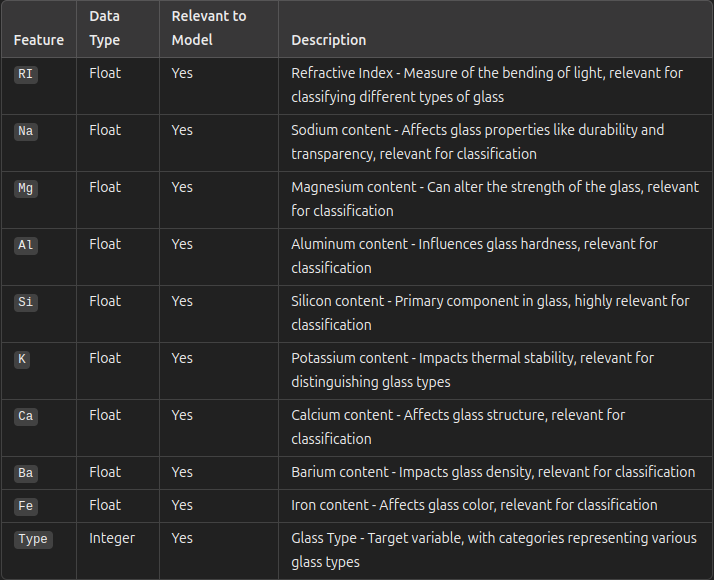

In [22]:
import pandas as pd
data=pd.read_csv("glass.csv")
print(data.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


## Exploratory Data Analysis

In [23]:
#Exploratory data analysis
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [24]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [25]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Data pre-processing

In [26]:
features=data.drop(columns=["Type"])
target=data['Type']

In [28]:
#standardize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
data_scaled=pd.DataFrame(features_scaled,columns=features.columns)
data_scaled['Type']=target
data_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


In [29]:
#plot boxplots for each feature
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

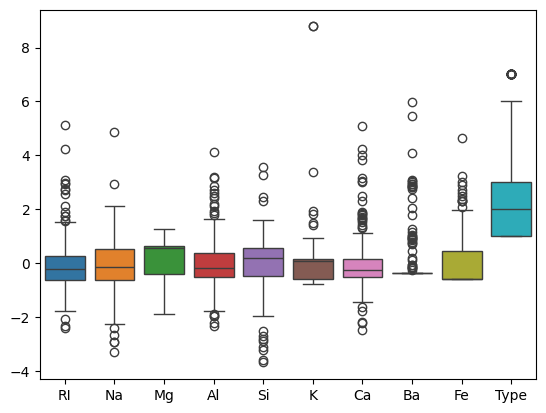

In [30]:
sns.boxplot(data=data_scaled)

In [31]:
#Almost all columns have outliers
import numpy as np
#Define a function to cap outliers based on IQR
def cap_outliers(df,columns):
    for col in columns:
        #Calculate Q1 and Q3
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        #Calculate IQR
        IQR=Q3-Q1
        #Define upper and lower bounds
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        #Cap the values outside these bounds
        df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
        df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    return df

In [32]:
#Apply the function to the dataframe
data_capped = cap_outliers(data,data.columns)
data_capped

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,0.0,6.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,0.0,6.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,0.0,6.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,0.0,6.0


In [35]:
#standardize
features=data_capped.drop(columns=["Type"])
target=data_capped['Type']
features_scaled=scaler.fit_transform(features)
data_scaled=pd.DataFrame(features_scaled,columns=features.columns)
data_scaled['Type']=target
data_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,0.0,-0.619091,1.0
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,0.0,-0.619091,1.0
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,0.0,-0.619091,1.0
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,0.0,-0.619091,1.0
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,0.0,-0.619091,1.0


<Axes: >

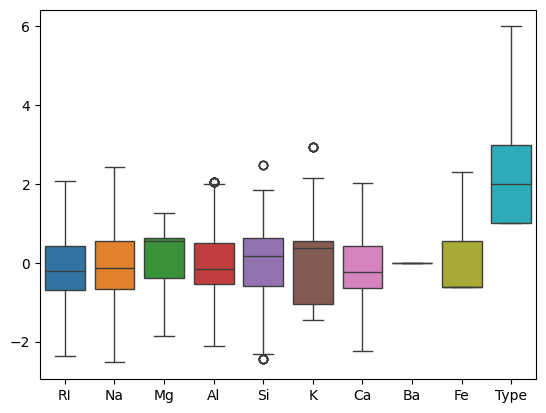

In [36]:
sns.boxplot(data=data_scaled)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
#Type as target feature
X = data_scaled.drop('Type', axis=1)
y = data_scaled['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

In [41]:
#Train the model
knn.fit(X_train, y_train)
#Make predictions on the test set
y_pred=knn.predict(X_test)

In [42]:
#Evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7441860465116279


In [43]:
#try and select correct value for k
acc=[]
#running KNN algorithm for k=3 to k=50 in steps of 2
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    train_acc=np.mean(knn.predict(X_train)==y_train)
    test_acc=np.mean(y_pred==y_test)
    acc.append([train_acc,test_acc])

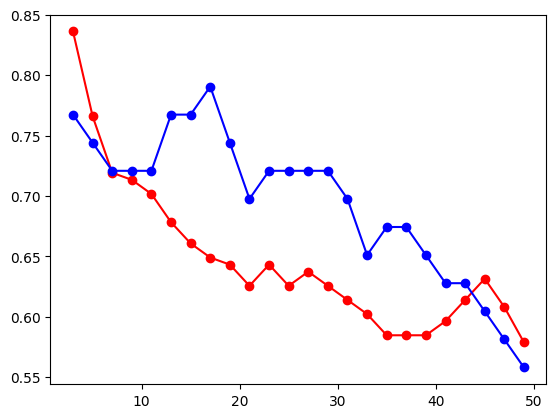

In [46]:
#plot the graph for tain_acc and test_acc
import matplotlib.pyplot as plt
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'ro-',label="Training Accuracy")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'bo-',label="Testing Accuracy")

In [47]:
#highest accuracy for k=7, k=9, k=43
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


In [48]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7209302325581395


In [49]:
knn=KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.627906976744186


In [53]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7441860465116279
